In [67]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact

In [68]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crop_recommendation.csv')

reading ta data set

In [69]:
print (data.shape)


(2200, 8)


In [70]:
data.head()



,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


to check if there is any missing value

In [71]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

to checks droups present in data set

In [72]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [73]:
print("Average Ratio of Nitrogen in the soil:{0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the soil:{0:.2f}".format(data["P"].mean()))
print("Average Ratio of Potassium in the soil:{0:.2f}".format(data["K"].mean()))
print("Average Temperature in Celsius:{0:.2f}".format(data["temperature"].mean()))
print("Average humidity in %:{0:.2f}".format(data["humidity"].mean()))
print("Average PH Value  in of the soil :{0:.2f}".format(data["ph"].mean()))
print("Average rainfall in mm:{0:.2f}".format(data["rainfall"].mean()))




Average Ratio of Nitrogen in the soil:50.55
Average Ratio of Phosphorous in the soil:53.36
Average Ratio of Potassium in the soil:48.15
Average Temperature in Celsius:25.62
Average humidity in %:71.48
Average PH Value  in of the soil :6.47
Average rainfall in mm:103.46


In [74]:
x=data.drop(['label'],axis=1)

In [75]:
y=data['label']

In [76]:
@interact
def summary(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
    print(data.groupby(['label']).agg({conditions : ['mean','max','min']}))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [77]:
print("Summer Crop")
print(data[(data['temperature']>30)&(data['humidity']>50)]['label'].unique())
print("winter Crop")
print(data[(data['temperature']<20)&(data['humidity']>30)]['label'].unique())
print("Rainy Crop")
print(data[(data['rainfall']>200)&(data['humidity']>30)]['label'].unique())

Summer Crop
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
winter Crop
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crop
['rice' 'papaya' 'coconut']


In [78]:
@interact
def sumary(con=['N','P','K','temperature','humidity','ph','rainfall']):
    print("crops which need more than average",con,'\n')
    print(data[data[con]>data[con].mean()]['label'].unique())
    print(".............................................")
    print("crops which need less than avg",con,'\n')
    print(data[data[con]<data[con].mean()]['label'].unique())

interactive(children=(Dropdown(description='con', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph', 'ra…

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

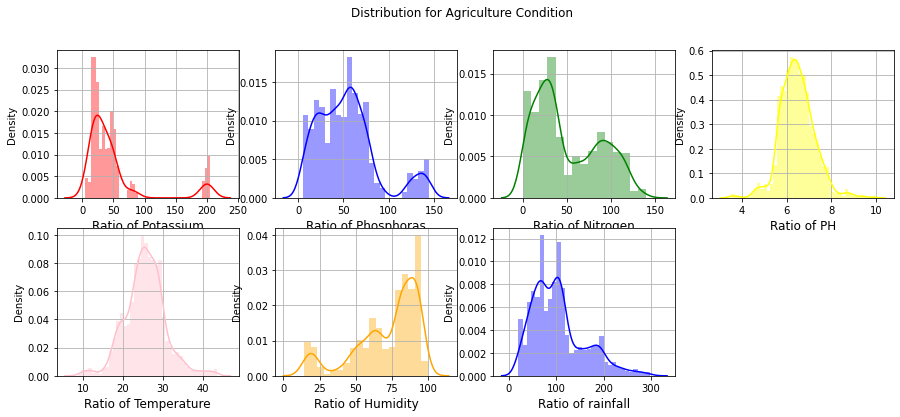

In [79]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(2,4,1)
sns.distplot(data['K'],color='red')
plt.xlabel('Ratio of Potassium',fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['P'],color='blue')
plt.xlabel('Ratio of Phosphoras',fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['N'],color='green')
plt.xlabel("Ratio of Nitrogen",fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['ph'],color='yellow')
plt.xlabel("Ratio of PH",fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['temperature'],color='pink')
plt.xlabel('Ratio of Temperature',fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['humidity'],color='orange')
plt.xlabel('Ratio of Humidity',fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['rainfall'],color='blue')
plt.xlabel("Ratio of rainfall",fontsize=12)
plt.grid()

plt.suptitle("Distribution for Agriculture Condition")
plt.show()

In [80]:
from sklearn.cluster import KMeans

In [81]:
x=x.values
x.shape

(2200, 7)

In [82]:
import sklearn.preprocessing as preprocessing
data_scaled=preprocessing.scale(x,axis=0)

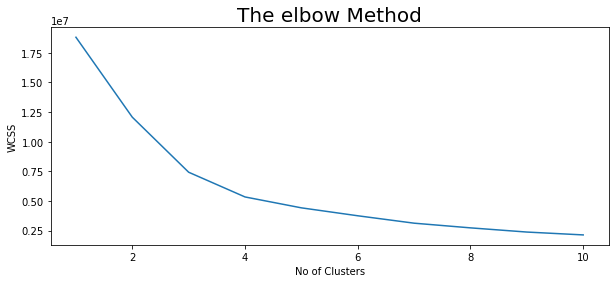

In [83]:
plt.rcParams['figure.figsize']=(10,4)
wcss=[ ]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The elbow Method',fontsize=20)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [84]:
km=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit(x)

In [85]:
y_pre=y_means.predict(x)

In [86]:
y_pre=pd.DataFrame(y_pre)
z=pd.concat([y_pre,y],axis=1)
z=z.rename(columns={0:'Clusters'})

In [87]:
print("Crops in first cluster")
print(z[z['Clusters']==0]['label'].unique())
print("Crops in second cluster")
print(z[z['Clusters']==1]['label'].unique())
print("Crops in third cluster")
print(z[z['Clusters']==2]['label'].unique())
print("Crops in fourth cluster")
print(z[z['Clusters']==3]['label'].unique())

Crops in first cluster
['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Crops in second cluster
['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Crops in third cluster
['grapes' 'apple']
Crops in fourth cluster
['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [88]:
x1=data.drop(['label'],axis=1)
x1.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [89]:
y1=data['label']
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

In [93]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(solver='liblinear')
log_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [94]:
y_pred=log_model.predict(x_test)

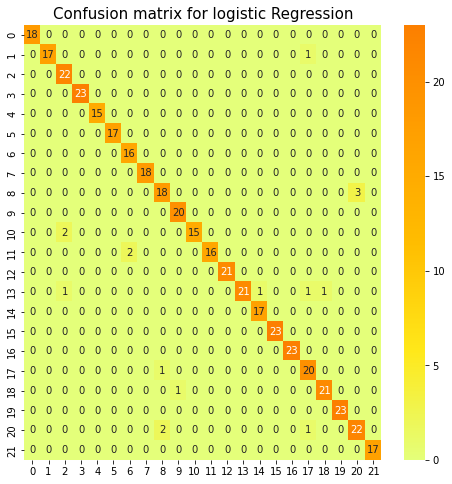

In [95]:
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize']=(8,8)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title('Confusion matrix for logistic Regression',fontsize=15)
plt.show()

In [96]:
predition=log_model.predict(np.array([[90,40,40,20,80,7,200]]))
print("The suggested Crop for such Climate:",predition)

The suggested Crop for such Climate: ['rice']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [97]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)
 

0.9613636363636363